In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (1575).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (1723).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (3308).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (2645).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (749).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (1271).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (2680).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (709).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (2258).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (1117).jpg
/kaggle/input/soybeanleafdataset/soybean.leaf.dataset/Caterpillar/caterpillar (1622).jpg
/kaggle/input/soybeanle

# Importing required Library

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

D0622 16:38:50.721318838    1694 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0622 16:38:50.721347679    1694 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0622 16:38:50.721351150    1694 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0622 16:38:50.721353843    1694 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0622 16:38:50.721356452    1694 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0622 16:38:50.721359078    1694 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0622 16:38:50.721361670    1694 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0622 16:38:50.

Tensorflow version 2.12.0


# Detect and init the TPU

In [3]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


**To go fast on a TPU, increase the batch size. The rule of thumb is to use batches of 128 elements per core (ex: batch size of 128*8=1024 for a TPU with 8 cores).**

In [5]:
IMAGE_SIZE = 500
BATCH_SIZE = 128
CHANNELS = 3

# Loading Dataset

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/soybeanleafdataset/soybean.leaf.dataset",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6410 files belonging to 3 classes.


In [8]:
# printing columns or class names

class_names = dataset.class_names
class_names

['Caterpillar', 'Diabrotica speciosa', 'Healthy']

In [9]:
# Printing the shape of the images and labels

for images, labels in dataset:
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    break  # Stop after the first batch

Images shape: (128, 500, 500, 3)
Labels shape: (128,)


In [10]:
label_counts = {label: 0 for label in class_names}

for images, labels in dataset:
    for label in labels:
        label_name = class_names[label]
        label_counts[label_name] += 1

for label, count in label_counts.items():
    print(f"{label}: {count}")

Caterpillar: 3309
Diabrotica speciosa: 2205
Healthy: 896


# Visualize some of the images from our dataset

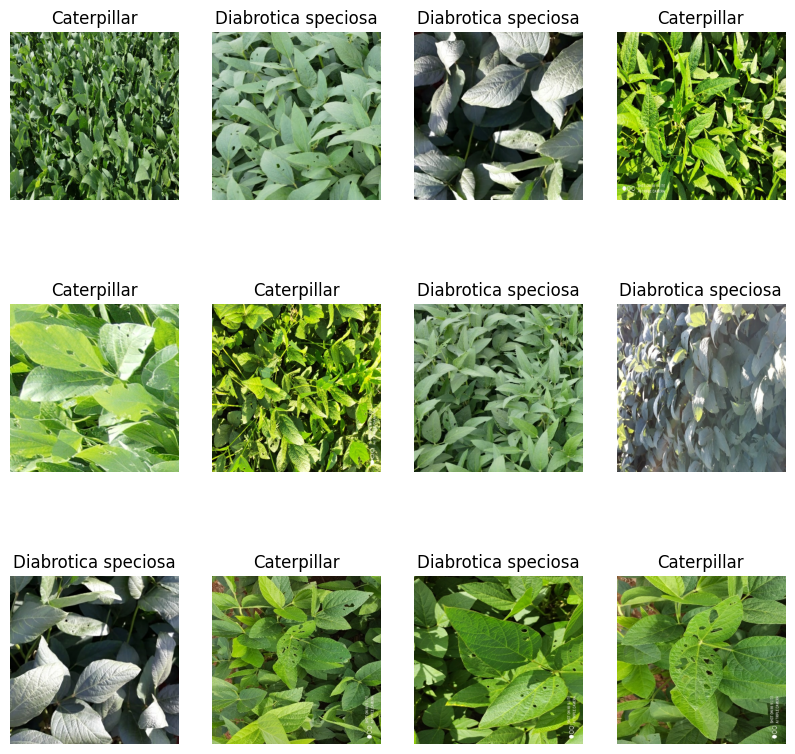

In [11]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# Function to Split Dataset
## Dataset should be bifurcated into 3 subsets, namely:

* Training: Dataset to be used while training
* Validation: Dataset to be tested against while training
* Test: Dataset to be tested against after we trained a model

In [12]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size) 
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset(dataset)

In [14]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 40

Length of Validation Dataset is 5

Length of Testing Dataset is 6


# Cache, Shuffle, and Prefetch the Dataset

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Creating a Layer for Resizing and Normalization

**Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.**

**You might be thinking why do we need to resize (500,500) image to (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it**

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(500,500),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3),
])

## Applying Data Augmentation to Train Dataset

In [18]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building a CNN Model

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

with strategy.scope(): 
    model = models.Sequential([
        resize_and_rescale,
        layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation='softmax'),
    ])

    model.build(input_shape=input_shape)


    model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    )

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (128, 500, 500, 3)        0         
                                                                 
 conv2d_12 (Conv2D)          (128, 498, 498, 64)       1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (128, 249, 249, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (128, 247, 247, 64)       36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (128, 123, 123, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (128, 121, 121, 64)      

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=30,
    callbacks=[callback],
    verbose=1
)

Epoch 1/30
40/40 [==============================] - ETA: 0s - loss: 0.9323 - accuracy: 0.5484

2023-06-22 16:54:22.331008: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-06-22 16:54:22.460986: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


40/40 [==============================] - 216s 5s/step - loss: 0.9323 - accuracy: 0.5484 - val_loss: 1.1129 - val_accuracy: 0.4891
Epoch 2/30
40/40 [==============================] - 205s 5s/step - loss: 0.8425 - accuracy: 0.6291 - val_loss: 0.7653 - val_accuracy: 0.7000
Epoch 3/30
40/40 [==============================] - 207s 5s/step - loss: 0.7542 - accuracy: 0.6879 - val_loss: 0.6794 - val_accuracy: 0.7250
Epoch 4/30
40/40 [==============================] - 207s 5s/step - loss: 0.6968 - accuracy: 0.7178 - val_loss: 0.7127 - val_accuracy: 0.7156
Epoch 5/30
40/40 [==============================] - 207s 5s/step - loss: 0.6715 - accuracy: 0.7205 - val_loss: 0.6509 - val_accuracy: 0.7406
Epoch 6/30
40/40 [==============================] - 209s 5s/step - loss: 0.6452 - accuracy: 0.7426 - val_loss: 0.6296 - val_accuracy: 0.7297
Epoch 7/30
40/40 [==============================] - 208s 5s/step - loss: 0.6147 - accuracy: 0.7590 - val_loss: 0.7248 - val_accuracy: 0.7047
Epoch 8/30
40/40 [======

In [24]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 6s 249ms/step - loss: 0.4417 - accuracy: 0.8594


# Saving Model

In [25]:
model.save("model.h5")

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the Accuracy and Loss Curves

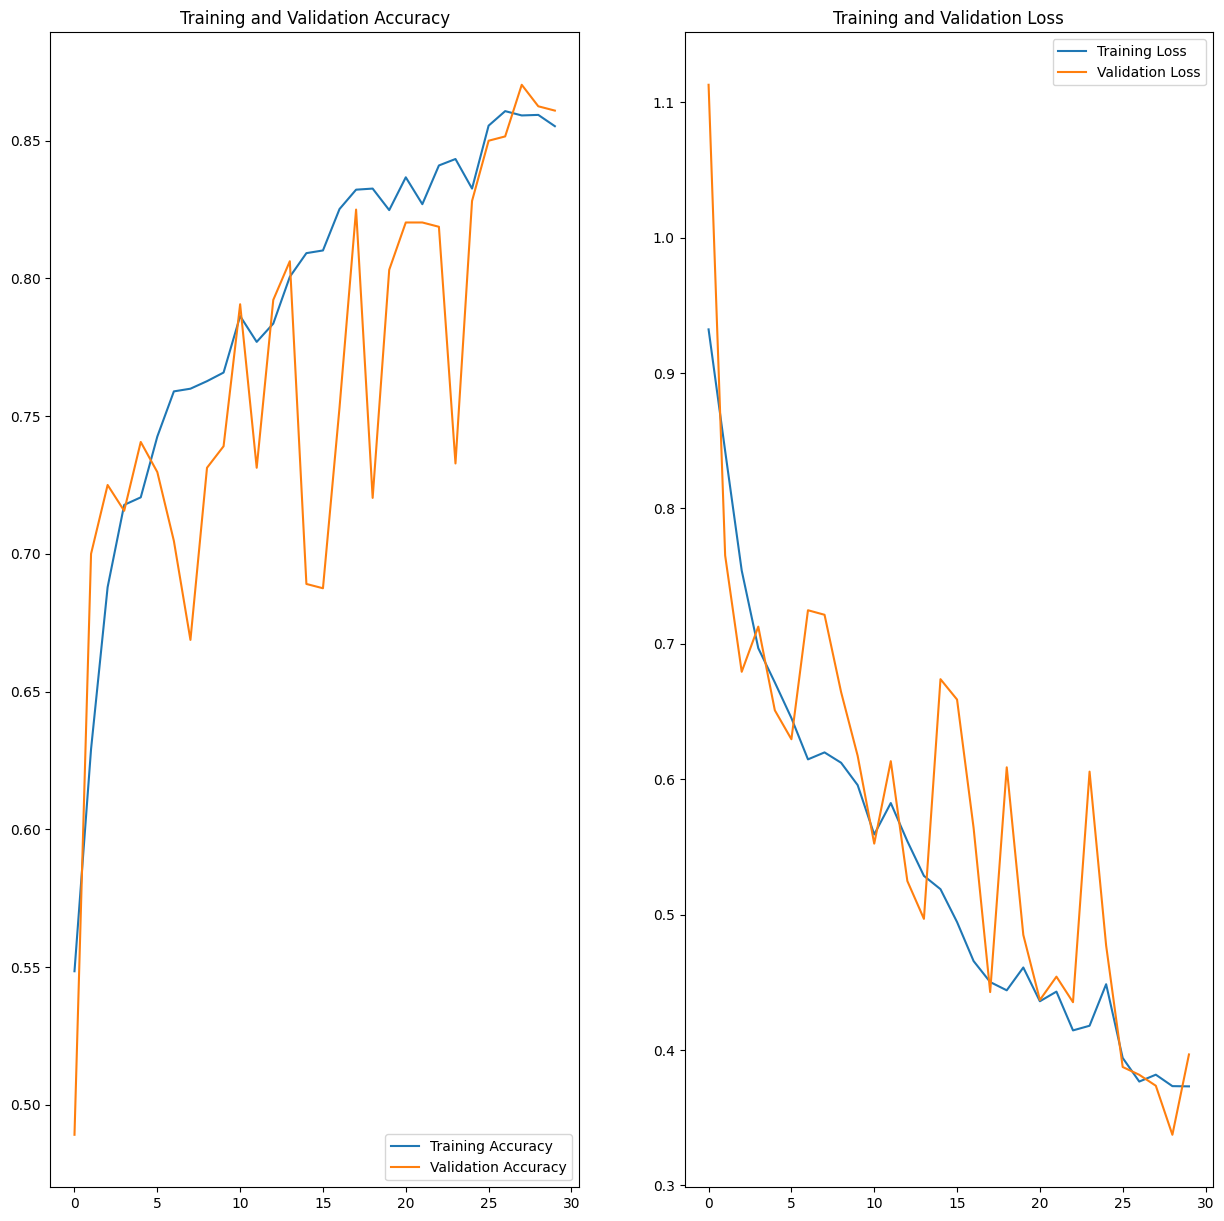

In [28]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(range(30), acc, label='Training Accuracy')
plt.plot(range(30), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(30), loss, label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

first image to predict
actual label: Diabrotica speciosa


2023-06-22 18:46:30.715240: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-06-22 18:46:30.736429: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


4/4 [==============================] - 5s 17ms/step
predicted label: Diabrotica speciosa


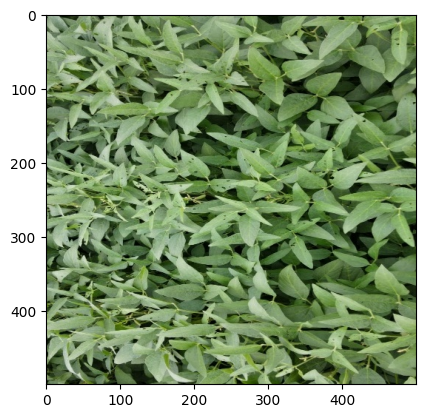

In [29]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# function for inference

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Now run inference on few sample images

2023-06-22 18:47:29.391352: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-06-22 18:47:29.479724: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


1/1 [==============================] - 0s 493ms/step


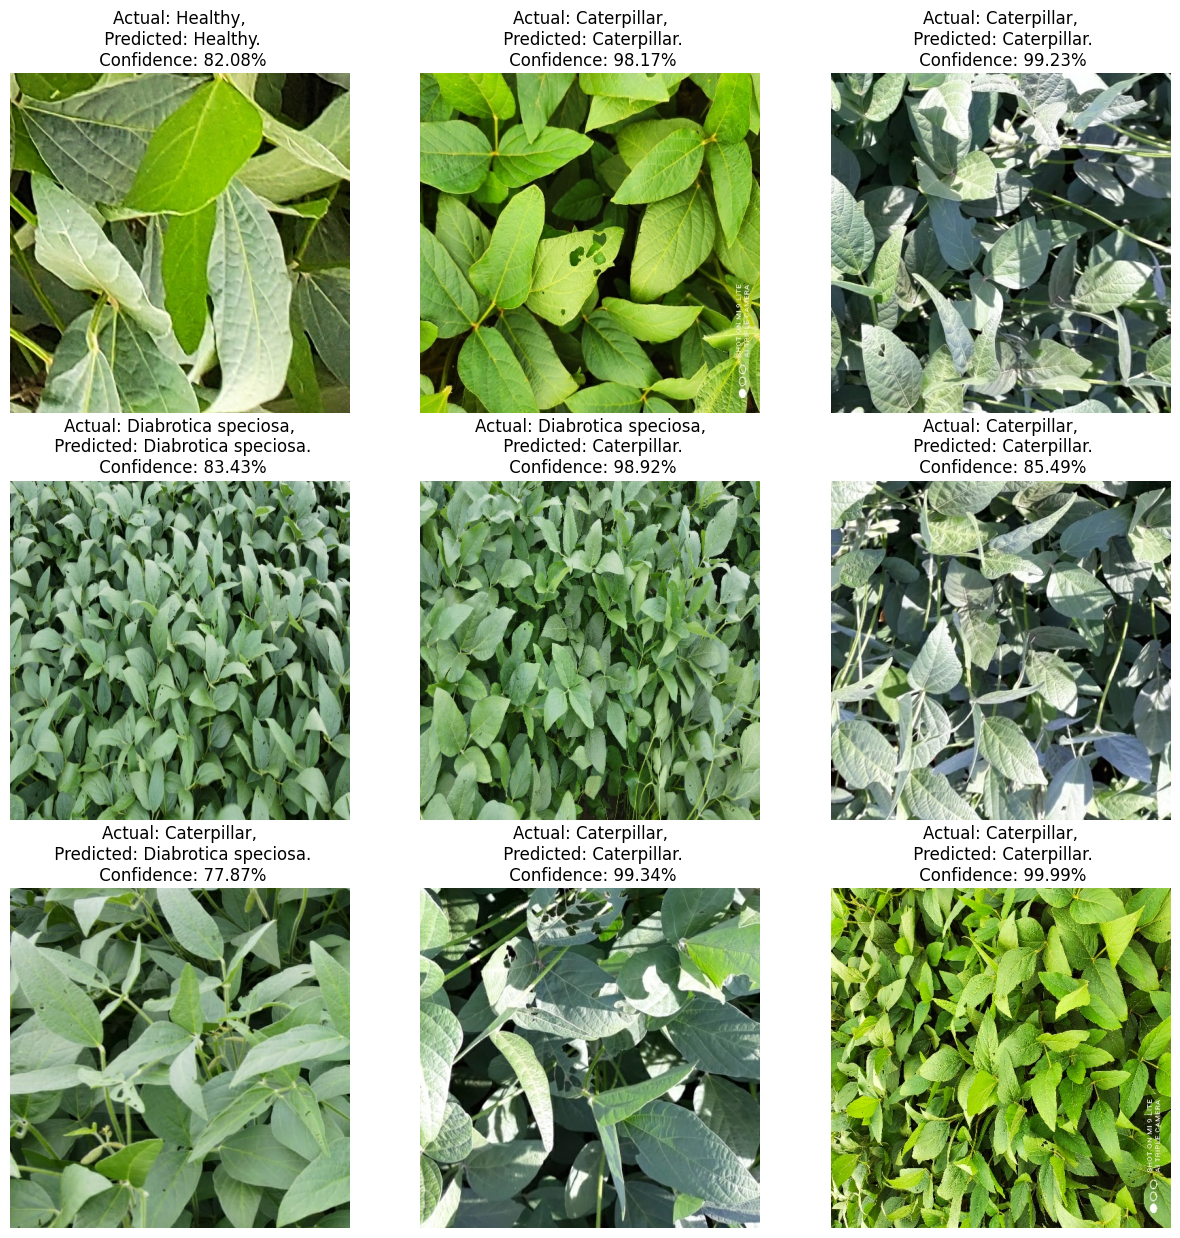

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")